# Dcube analytics - Case Study

## Author: <a href="https://github.com/agrawal-s" target="_blank" >Shrikant Agrawal</a>


## Problem Statement:
One of the challenge for all Pharmaceutical companies is to understand the persistency  of drug as per the physician prescription. 

With an objective to gather insights on the factors that are impacting the persistency, build a classification for the given dataset. 


### Target Variable: Persistency_Flag

Variable description is attached along with the data.


### Model Evaluation:
Following are the things we are expecting in the submission:
1.	R/Python code (executable) used for the analysis (with proper comments and readability). If it’s a Jupyter notebook with all the results in it, that will be best!
2.	Model diagnostics to be updated in the attached excel template (Excel File: Analysis Results)
3.	Final Analytical (processed) dataset used, which includes the additional derived variables and any other processing applied
4.	Attach a document along with brief description of following in the mail:
    a.	Changes done in the analytical dataset provided
    b.	Any other highlights about the process you followed to ensure a thorough evaluation



# Solution: Data Science Process

1. Defining the problem.
2. Getting the data we need.
3. Making the data fit for use.
4. Making the data to confess (Model Build).
5. Telling the story with Data (Model evaluation and reporting).

In [1]:
#Importing the data wrangling dependencies.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Getting the data into the Environment.

In [2]:
# we define the data directory seperately so that,
# we can replicate the results in different environments.

df_dir = "F://GIT_root//Datasets//D3//Case Study Data scientist Challenge_dataset_Persistent_Non_Persistent.xlsx"


In [3]:
# Importing the data into the env. and getting the first look.
df =  pd.read_excel(df_dir, sheet_name = 'Dataset')
df

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


## Preliminary analysis of the data

1. Number of records, number of attributes
2. Checking for Nulls.

In [4]:
# Getting the information about all the attributes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [5]:
df.describe()

# It seems there are only two continuous (integer) attributes. Rest of the data seems categorical.

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [6]:
#Checking for Nulls.

print(df.isnull().sum().sum())

0


## Exploratory Data Analysis

### Checking the distribution of target variable w.r.t all categorical attributes.

The key idea behind this step is to make sure the data is fit for use. Here, we'll observe the behavior of target variable w.r.t various attributes and will try to find which attributes needs to be modified / removed/ transformed so that the final dataset is richer in quality and ready to be used for building the model.

Since it is the patient information data, we will avoid EDA on identification information (patient ID and provider attributes) since they provide no information about drug or patient's health. Thus, we'll remove these attributes entirely. This can also be regarded as human / Domain Expert intervention. 

In [7]:
df = df.drop([ 'Ntm_Speciality','Ntm_Specialist_Flag','Ntm_Speciality_Bucket'], axis = 1)
df

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,N,N,0,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,N,N,0,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,N,N,0,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,N,Y,0,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,Y,Y,0,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,N,N,0,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,N,N,0,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,N,N,7,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,N,N,0,...,N,N,N,N,N,N,N,N,N,0


In [8]:
df

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,N,N,0,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,N,N,0,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,N,N,0,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,N,Y,0,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,Y,Y,0,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,N,N,0,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,N,N,0,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,N,N,7,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,N,N,0,...,N,N,N,N,N,N,N,N,N,0


#### EDA on categorical attributes.

We try to find out the distribution of target variable w.r.t categorical variables. I have used Group by to get the distribution counts and Matplotlib - bar plots to visualise those counts.

In [9]:
# Creating a list of all categorical attributes.

col_list = list(df.columns)
col_list.remove('Ptid') # remove ids

col_list.remove('Dexa_Freq_During_Rx') # remove integer attribute
col_list.remove('Count_Of_Risks')# remove integer attribute
col_list.remove('Persistency_Flag')# removing target variable.


In [10]:

for col in col_list:
    print(df.loc[:,[col,'Persistency_Flag', 'Ptid']].groupby([col,'Persistency_Flag']).count())
    print('------------------------------------------')

                         Ptid
Gender Persistency_Flag      
Female Non-Persistent    2018
       Persistent        1212
Male   Non-Persistent     117
       Persistent          77
------------------------------------------
                                   Ptid
Race             Persistency_Flag      
African American Non-Persistent      65
                 Persistent          30
Asian            Non-Persistent      43
                 Persistent          41
Caucasian        Non-Persistent    1963
                 Persistent        1185
Other/Unknown    Non-Persistent      64
                 Persistent          33
------------------------------------------
                               Ptid
Ethnicity    Persistency_Flag      
Hispanic     Non-Persistent      66
             Persistent          32
Not Hispanic Non-Persistent    2008
             Persistent        1227
Unknown      Non-Persistent      61
             Persistent          30
------------------------------------------
   

                                                   Persistent         342
------------------------------------------
                                                                     Ptid
Comorb_Disorders_of_lipoprotein_metabolism_and_... Persistency_Flag      
N                                                  Non-Persistent    1170
                                                   Persistent         489
Y                                                  Non-Persistent     965
                                                   Persistent         800
------------------------------------------
                                                                     Ptid
Comorb_Osteoporosis_without_current_pathologica... Persistency_Flag      
N                                                  Non-Persistent    1666
                                                   Persistent         841
Y                                                  Non-Persistent     469
                          

                                      Ptid
Risk_Immobilization Persistency_Flag      
N                   Non-Persistent    2121
                    Persistent        1289
Y                   Non-Persistent      14
------------------------------------------
                                       Ptid
Risk_Recurring_Falls Persistency_Flag      
N                    Non-Persistent    2087
                     Persistent        1268
Y                    Non-Persistent      48
                     Persistent          21
------------------------------------------


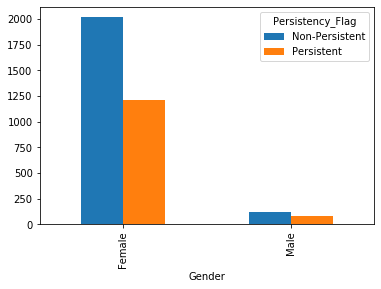

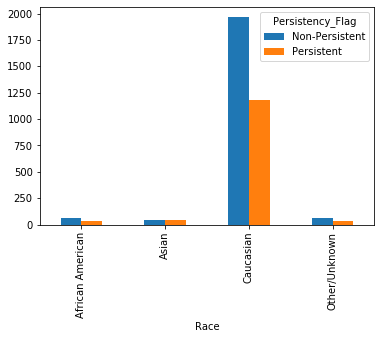

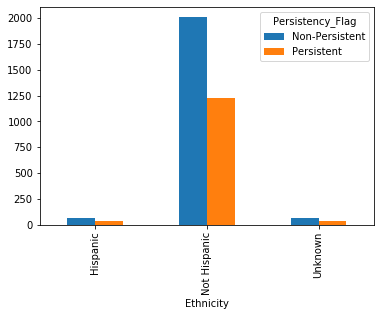

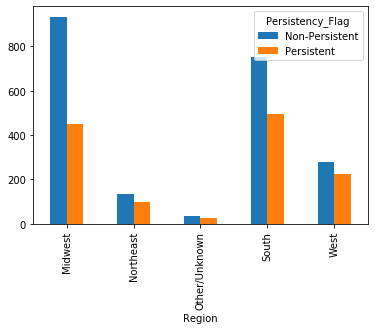

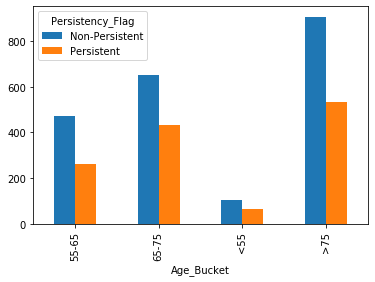

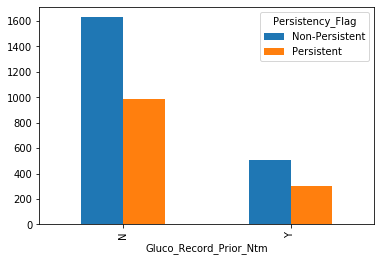

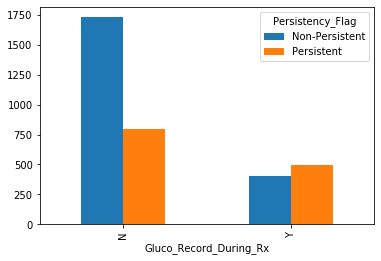

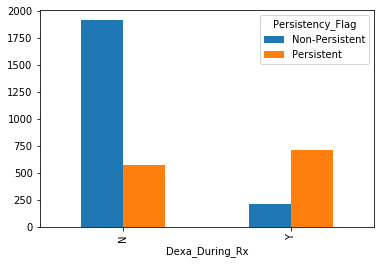

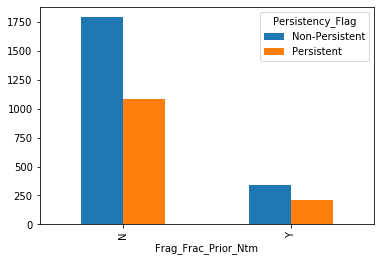

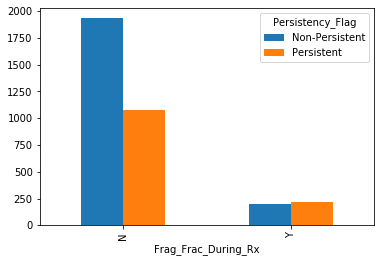

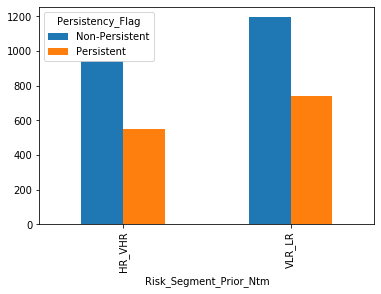

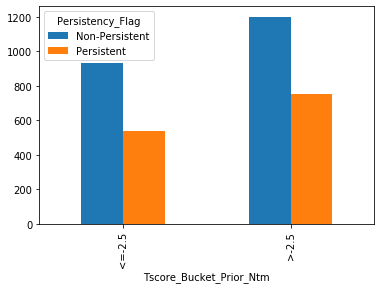

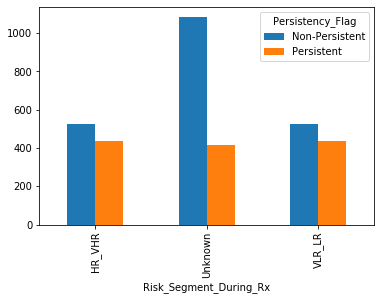

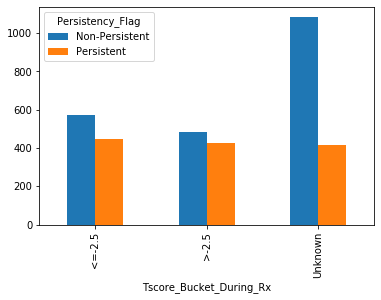

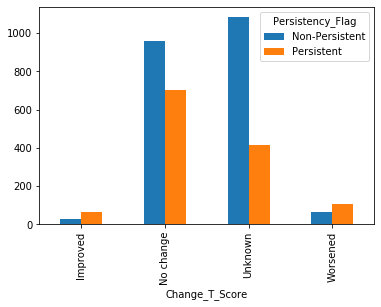

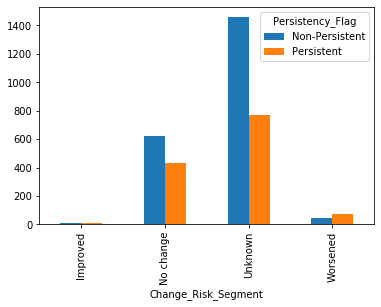

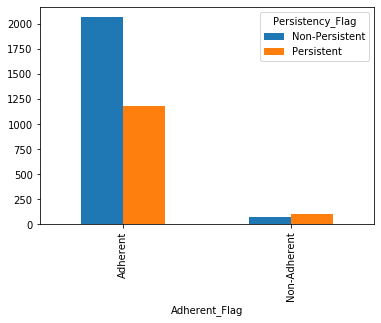

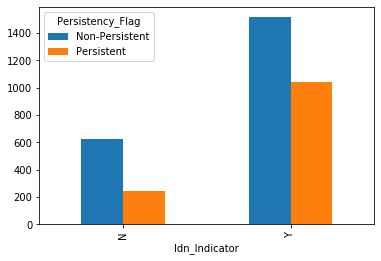

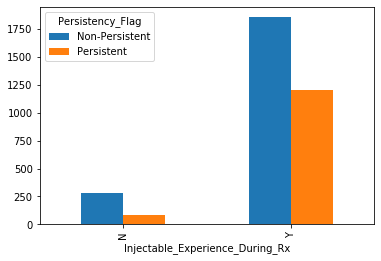

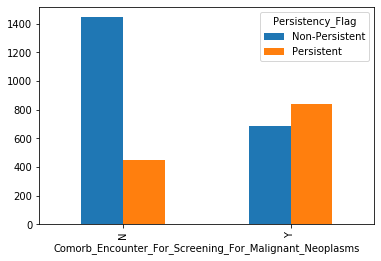

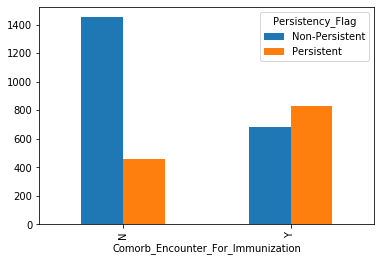

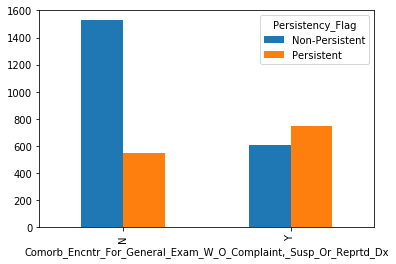

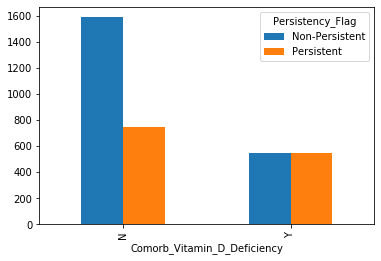

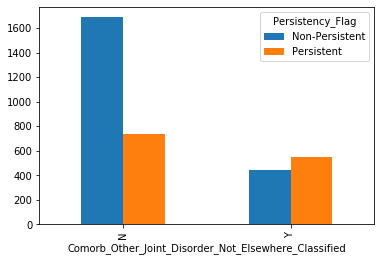

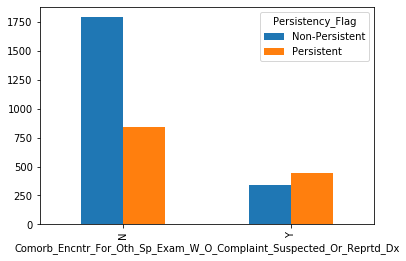

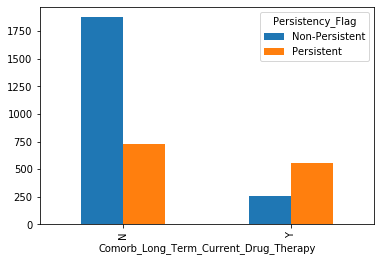

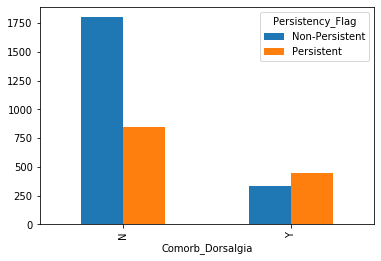

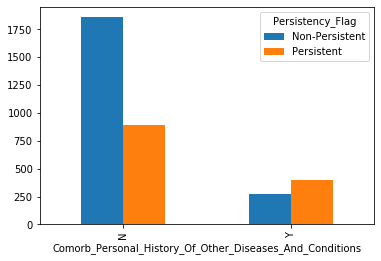

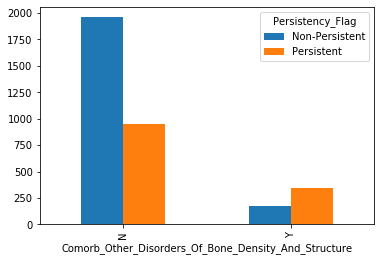

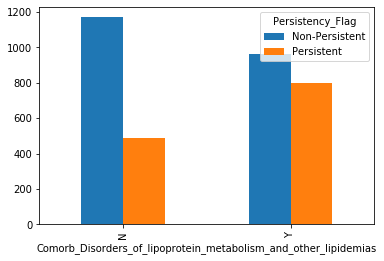

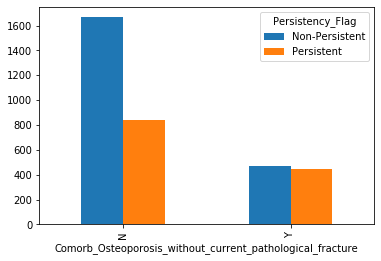

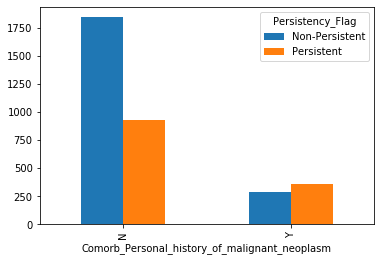

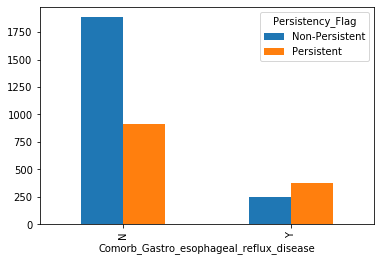

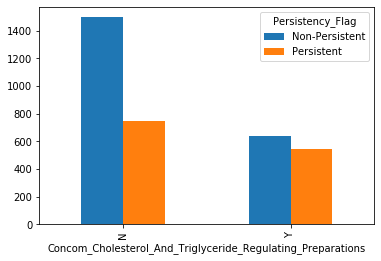

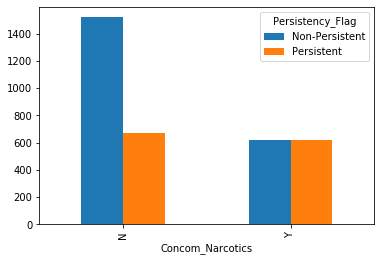

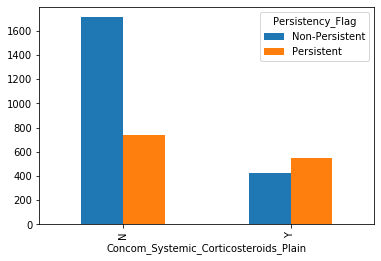

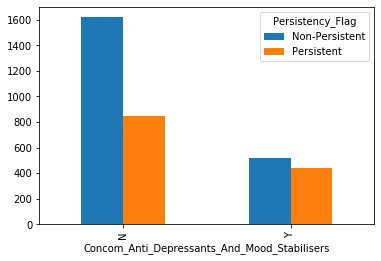

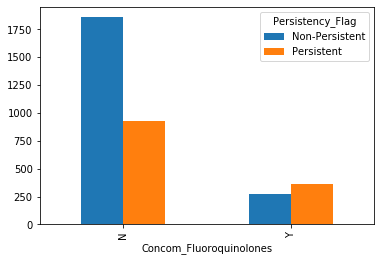

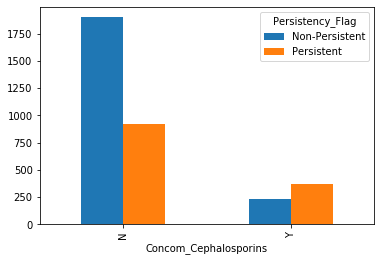

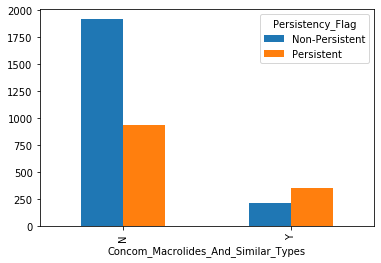

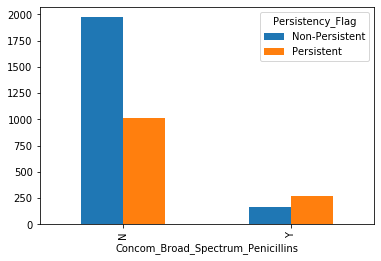

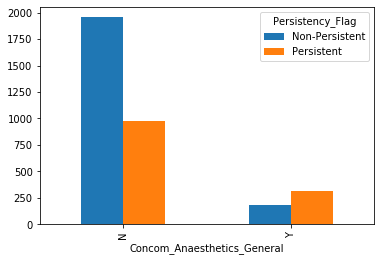

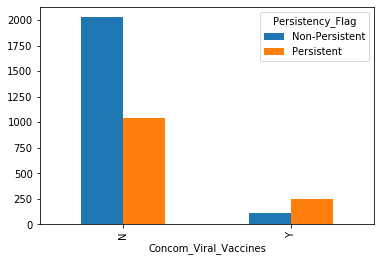

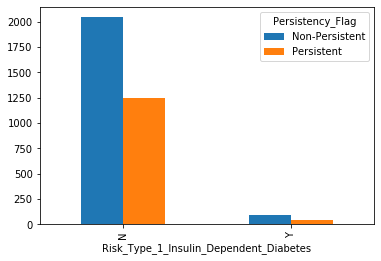

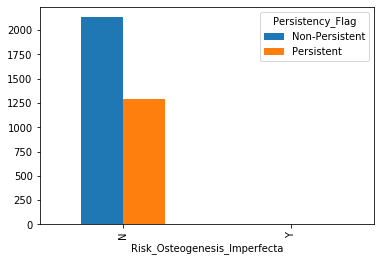

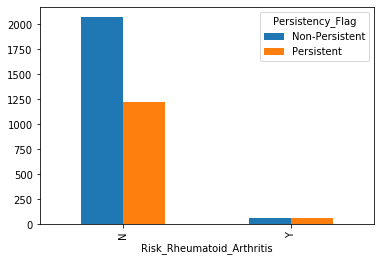

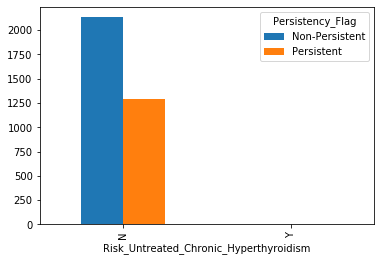

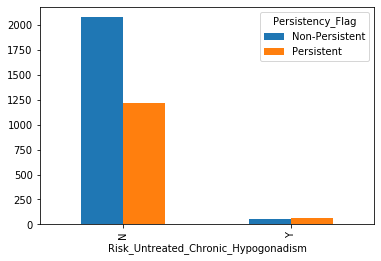

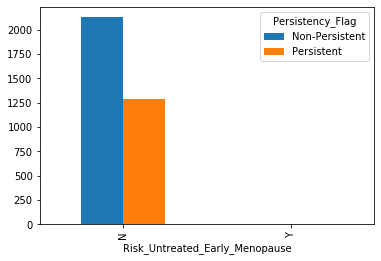

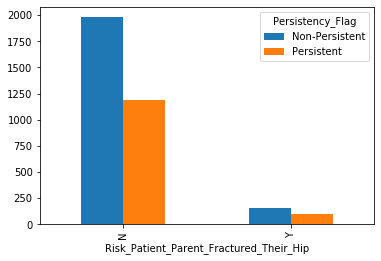

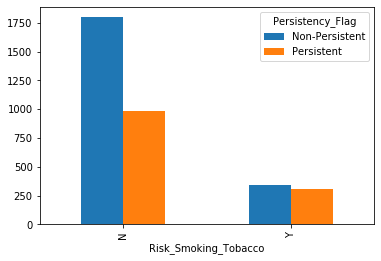

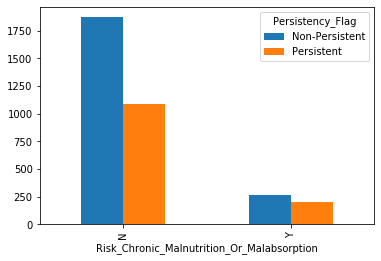

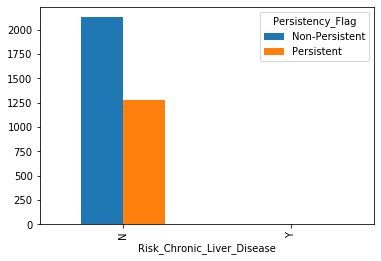

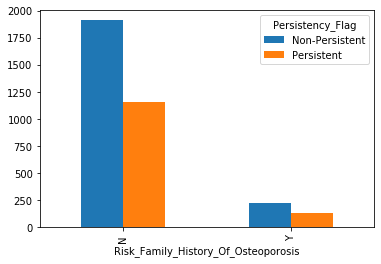

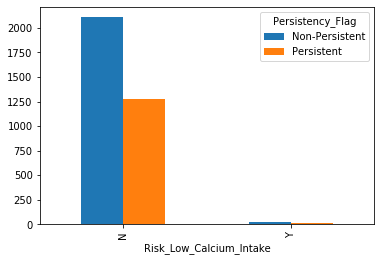

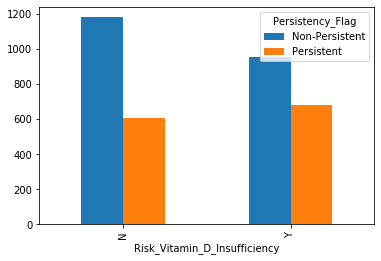

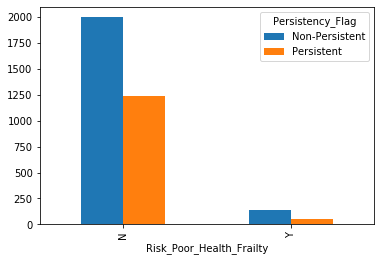

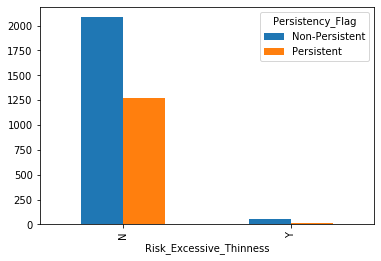

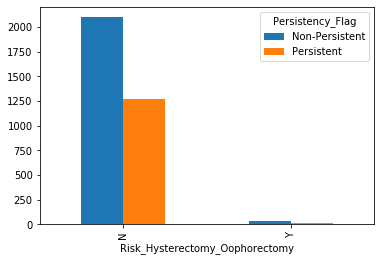

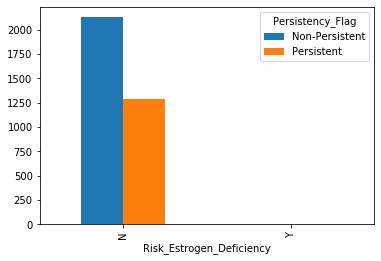

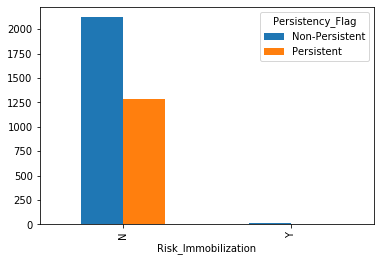

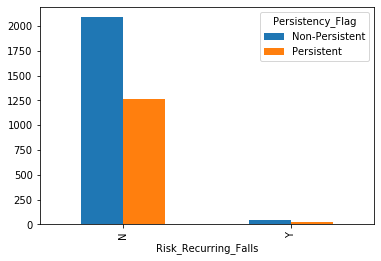

In [11]:
# Plotting the distribution using Matplotlib library. 
# (A picture speaks more than a 1000 words.)
for col in col_list:
    
    df.groupby(col).Persistency_Flag.value_counts().unstack().plot.bar()
    plt.show()

#I also tried to plot using Histogram but it didnt provide enogh relevant information.
#df.hist(figsize = (16,20), bins = 50)

Converting Y/N attributes to 0/1 for finding out correlations with response variable.

In [12]:
YN_cols = list(df.columns[df.isin(['Y']).any()]  )#identifying all binary attributes
YN_cols

['Gluco_Record_Prior_Ntm',
 'Gluco_Record_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_Prior_Ntm',
 'Frag_Frac_During_Rx',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
 'Comorb_Osteoporosis_without_current_pathological_fracture',
 'Comorb_Personal_history_of_malignant_neoplasm',
 'Comorb_Gastro_esophageal_reflux_disease',
 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
 'Concom_Narcotics',
 'Concom_S

In [13]:
for col in YN_cols:
    df[col] = df[col].map(dict(Y=1, N=0))

Identifying all other categorical attributes

In [14]:
list(df.columns[~df.isin([0]).any()]  )

['Ptid',
 'Persistency_Flag',
 'Gender',
 'Race',
 'Ethnicity',
 'Region',
 'Age_Bucket',
 'Risk_Segment_Prior_Ntm',
 'Tscore_Bucket_Prior_Ntm',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment',
 'Adherent_Flag']

In [15]:
#converting other Binary response variables to 1s and 0s.

df.Persistency_Flag = pd.Series(np.where(df['Persistency_Flag'].values == 'Persistent', 1, 0),
          df.index)
df.Gender = pd.Series(np.where(df['Gender'].values == 'Male', 1, 0),
          df.index)
df.Adherent_Flag = pd.Series(np.where(df['Adherent_Flag'].values == 'Adherent', 1, 0),
          df.index)
df.Risk_Segment_Prior_Ntm = pd.Series(np.where(df['Risk_Segment_Prior_Ntm'].values == 'HR_VHR', 1, 0),
          df.index) #Counting unknowns as low risk




In [16]:
df['Risk_Segment_Prior_Ntm']

0       0
1       0
2       1
3       1
4       1
       ..
3419    0
3420    1
3421    0
3422    0
3423    0
Name: Risk_Segment_Prior_Ntm, Length: 3424, dtype: int32

#### One Hot encoding other categorical attributes.

One hot encoding is used to convert categorical variables into a set of binary variable such that each attribute represents various categories of that attribute. This is extremely useful method when there are multiple categories and we need to identify correlations between various categories and the response variable. There are two common approaches in Python: sklearn.preprocessing.OneHotEncoder or Pandas.getdummies. 

Here, I've used pandas.getdummies() to create different attributes for each category of each attribute. I've also provided prefixes to know which attribute they're converted from. Later, we'll remove the old categories.

In [17]:
race = pd.get_dummies(df.Race, prefix='Race')
age = pd.get_dummies(df.Age_Bucket, prefix='Age')
ethnicity = pd.get_dummies(df.Ethnicity, prefix='Ethnicity')
region = pd.get_dummies(df.Region, prefix='Region')


In [18]:
df

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,1,1,Caucasian,Not Hispanic,West,>75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,P2,0,1,Asian,Not Hispanic,West,55-65,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,P3,0,0,Other/Unknown,Hispanic,Midwest,65-75,0,0,0,...,0,1,0,0,0,0,0,0,0,2
3,P4,0,0,Caucasian,Not Hispanic,Midwest,>75,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,P5,0,0,Caucasian,Not Hispanic,Midwest,>75,1,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,1,0,Caucasian,Not Hispanic,South,>75,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3420,P3421,1,0,Caucasian,Not Hispanic,South,>75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3421,P3422,1,0,Caucasian,Not Hispanic,South,>75,0,0,7,...,0,0,1,0,0,0,0,0,0,1
3422,P3423,0,0,Caucasian,Not Hispanic,South,55-65,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_backup = df.copy()

In [20]:
df = pd.concat([df,race,age,ethnicity,region], axis =1)

In [21]:
df = df.drop(['Race','Age_Bucket','Ethnicity','Region'], axis = 1)

In [22]:
df

,Ptid,Persistency_Flag,Gender,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,...,Age_<55,Age_>75,Ethnicity_Hispanic,Ethnicity_Not Hispanic,Ethnicity_Unknown,Region_Midwest,Region_Northeast,Region_Other/Unknown,Region_South,Region_West
0,P1,1,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,P2,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,P3,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3,P4,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,1,0,0,0,0
4,P5,0,0,1,1,0,0,0,0,1,...,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3420,P3421,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3421,P3422,1,0,0,0,7,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3422,P3423,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


Now, We'll find the correlation between the attributes 

In [23]:
df.corr()

,Persistency_Flag,Gender,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Adherent_Flag,...,Age_<55,Age_>75,Ethnicity_Hispanic,Ethnicity_Not Hispanic,Ethnicity_Unknown,Region_Midwest,Region_Northeast,Region_Other/Unknown,Region_South,Region_West
Persistency_Flag,1.000000,0.010343,-0.005758,0.212704,0.335235,0.491823,0.000318,0.106935,-0.012223,-0.112488,...,0.001425,-0.011878,-0.017690,0.024155,-0.015957,-0.088015,0.025571,0.011083,0.030759,0.057971
Gender,0.010343,1.000000,0.024992,-0.003173,-0.022068,-0.031272,0.019665,0.032344,0.023967,-0.006910,...,0.050551,0.060061,-0.019339,-0.001612,0.022337,-0.021521,0.019377,-0.013474,0.014036,0.001990
Gluco_Record_Prior_Ntm,-0.005758,0.024992,1.000000,0.375134,-0.002280,-0.006271,0.067839,0.069412,-0.004183,0.017839,...,-0.006501,0.023278,-0.024949,0.016390,0.002592,-0.004422,0.110859,-0.016305,-0.005977,-0.058456
Gluco_Record_During_Rx,0.212704,-0.003173,0.375134,1.000000,0.074775,0.118155,0.065961,0.111802,-0.001749,-0.043668,...,-0.005341,0.013322,-0.007223,0.013904,-0.012253,-0.030173,0.105214,-0.009126,0.015841,-0.051067
Dexa_Freq_During_Rx,0.335235,-0.022068,-0.002280,0.074775,1.000000,0.604437,0.068839,0.073251,0.042569,-0.032325,...,-0.020336,-0.000736,0.017101,-0.010841,-0.002335,-0.033671,-0.002532,-0.003273,-0.049838,0.117521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Region_Midwest,-0.088015,-0.021521,-0.004422,-0.030173,-0.033671,0.003922,0.011394,-0.024446,-0.014455,0.002383,...,0.022032,0.004544,-0.102034,0.110352,-0.050905,1.000000,-0.221923,-0.109935,-0.623008,-0.341194
Region_Northeast,0.025571,0.019377,0.110859,0.105214,-0.002532,0.014547,0.030331,-0.004458,0.032429,-0.017392,...,-0.028392,-0.001183,0.009477,-0.031518,0.034925,-0.221923,1.000000,-0.036005,-0.204041,-0.111744
Region_Other/Unknown,0.011083,-0.013474,-0.016305,-0.009126,-0.003273,0.012976,-0.004073,-0.002091,-0.018683,0.000321,...,0.000944,0.008044,-0.009575,0.012787,-0.008229,-0.109935,-0.036005,1.000000,-0.101077,-0.055355
Region_South,0.030759,0.014036,-0.005977,0.015841,-0.049838,-0.039336,-0.077630,-0.051720,-0.004579,0.027726,...,-0.006941,-0.025914,0.052084,-0.066887,0.040973,-0.623008,-0.204041,-0.101077,1.000000,-0.313701


In [24]:
# Identifying which attributes are most correlated to the response variable
df.corr()['Persistency_Flag'].sort_values(ascending = False).head(60)

Persistency_Flag                                                      1.000000
Dexa_During_Rx                                                        0.491823
Comorb_Long_Term_Current_Drug_Therapy                                 0.352760
Dexa_Freq_During_Rx                                                   0.335235
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms                0.322320
Comorb_Encounter_For_Immunization                                     0.314887
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx       0.289828
Comorb_Other_Disorders_Of_Bone_Density_And_Structure                  0.247283
Concom_Systemic_Corticosteroids_Plain                                 0.242854
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified                  0.233279
Concom_Anaesthetics_General                                           0.222293
Concom_Viral_Vaccines                                                 0.222241
Concom_Macrolides_And_Similar_Types                 

In [25]:
#plotting heatmap
import seaborn as sns

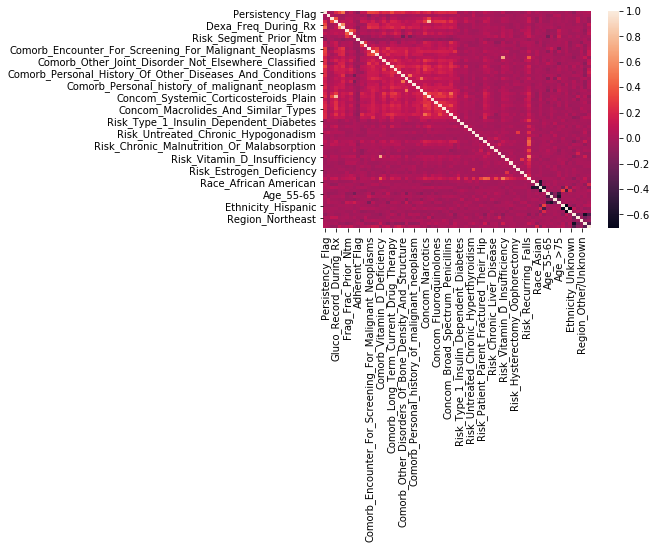

In [26]:
sns.heatmap(df.corr())

## Making the Data to confess. (Model Build)

Once the data is cleaned and fit for use, we'll build the model. There are various approaches to build a binary classification model. a brief of them are provided below. 

### Models' Definition and Justification


### Data Modelling using predefined distribution.

In this method, we assume that the data is generated from an undefined statistical distribution. Using the data, we try to fit a model that best represents the data distribution. The remaining variance in the data is identified as error that has mean arounf the fitted model and a constant variance.

#### Pro's:
1. High interpretability.
2. It follows the scientific method of building the Hypothesis, evaluating it based on the evidence (data), and then providing the result whether the hypotheis is correct or not.

#### Con's:
1. It is naive to assume that the data must have a distribution of a form that can be defined from a mathematical equation.

2. Accuracy may differ greatly based on how well the data fit the distribution. 

3. Higher chances of underfitting.

4. works poorly with high dimensional data.

#### Examples (for binary classification): 
Logistic regression, Baysian Networks, LDA.



### Algorithmic Modelling:
    
In this approach, there is no prior assumption of mathematical model for the data. Instead, the data is said to be generated from a black box. Using algorithmic approaches, we try to replicate the data generation capabilites of the black box. Using hyperparameter tuning, we can closely mimic the black box.

#### Pro's:

1. Provides relatively high accuracy as compared to data modelling approach since the main objective is to provide high accuracy.

2. Works well with High dimensional data.

#### Con's:

1. Little interpratablility.
2. Hyperparameter tuning may lead to overfitting the data.

#### Examples:

Decision Tree Classifiers, KNN, Random Forest, Neural Networks.

### Deep Learning:

Deep learning is a subset of Algorithmic modelling where we try to extract features from the data using layers of neural networks. The key idea here is to train the neural network model such that it can predict features of different classes. The model is trained on the dataset several times (# epochs) to reassign weights and biases of each node in each of the hidden layers. The cost function is based on the final output layer and is optimisied using Stochastic gradient descent method. 

#### Pro's:

1. Relatively high accuracy than data modelling approach.
2. Works extremely well with high dimensional data and unstructured data (images, sound, sensory data.)

#### Con's:
1. Little to no interpretability.
2. Takes a really long time to train high volume data.
3. It also requires a large amount of data due to involvement of a large number of attributes.

#### Examples:
Sequential (Dense) Neural Networks, Convolutional Neural Networks.

#### I have built a model of each type above. 

In [27]:
#Seperating response variable and independent variables from the dataset.
Y = df['Persistency_Flag']
X = df.drop(['Ptid','Persistency_Flag'],axis = 1)

In [28]:
#Dropping other columns that are not required.

X = X.drop(list(X.columns[~X.isin([0]).any()]  ), axis = 1)

In [29]:
X

,Gender,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Adherent_Flag,Idn_Indicator,...,Age_<55,Age_>75,Ethnicity_Hispanic,Ethnicity_Not Hispanic,Ethnicity_Unknown,Region_Midwest,Region_Northeast,Region_Other/Unknown,Region_South,Region_West
0,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,1,1,0,...,0,1,0,1,0,1,0,0,0,0
4,0,1,1,0,0,0,0,1,1,0,...,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,0,0,0,0,0,0,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
3420,0,0,0,0,0,0,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
3421,0,0,0,7,1,0,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
3422,0,0,0,0,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0


In [30]:
X.columns

Index(['Gender', 'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx',
       'Dexa_Freq_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm', 'Adherent_Flag',
       'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
       'Comorb_Osteoporosis_without_current_pathological_fracture',
       'Comorb_Personal_his

In [31]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [33]:
#dividing the test data further into test set and validation set. 
#final distribution of tran-test-val set is 80-10-10
x_test,x_val,y_test,y_val = train_test_split(x_test, y_test, test_size = 0.5, random_state = 42)

In [34]:
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)
print('Val Features Shape:', x_val.shape)
print('Val Labels Shape:', y_val.shape)


Training Features Shape: (2739, 71)
Training Labels Shape: (2739,)
Testing Features Shape: (342, 71)
Testing Labels Shape: (342,)
Val Features Shape: (343, 71)
Val Labels Shape: (343,)


### Logistic regression with lasso penalty

Here we're using lasso regularisation to remove the attributes that are not important. This is done by introducing a regularisation parameter lambda that introduces a little bias into the model. This reduces the varianve in the model and hence reduces the chances of overfitting.


To get the best value of Lambda, we use cross validation to identify what level of regularisation would provide best fit.

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


lambda_values = [1e-4, 5e-4, 1e-3, 5e-3,1e-2, 5e-2, 1e-1, 5e-1,1e-0, 5e-0,1e+1, 5e+1, 1e+2, 5e+2, 1e+3, 5e+3 ]
acc_vals = []
for l in lambda_values:
    log_clf = LogisticRegression(C = 1/l, class_weight= 'balanced', penalty= 'l1', solver= 'liblinear',random_state=42)
    acc = cross_val_score(log_clf,x_train,y_train,cv=10,scoring='accuracy',n_jobs=-1)
    acc_vals.append(np.mean(acc))
    

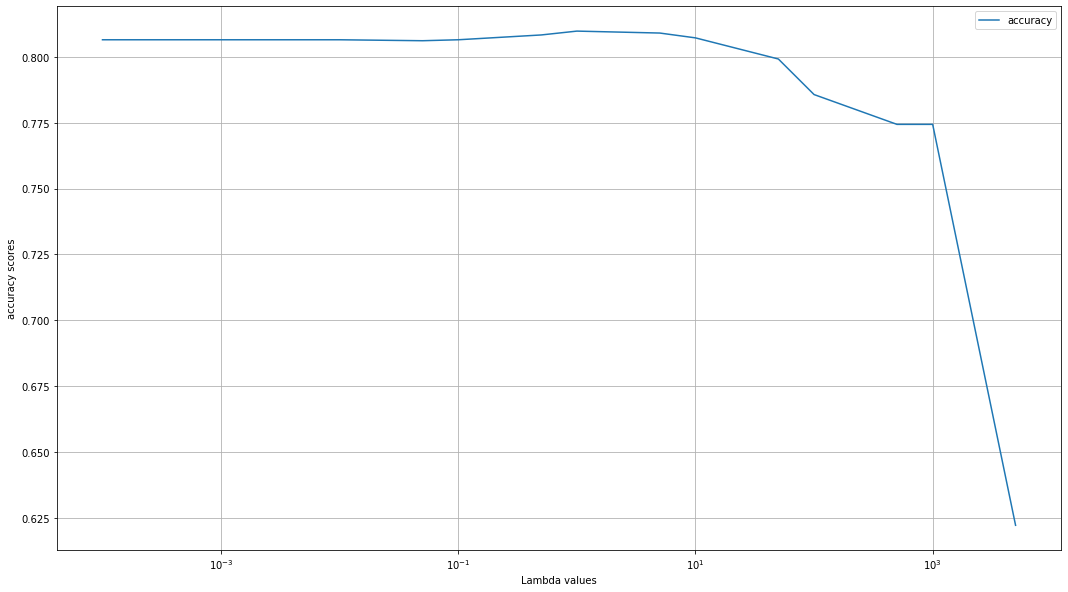

In [36]:
plt.figure(figsize = (18,10))
plt.semilogx(lambda_values,acc_vals, label ='accuracy' )
plt.legend()
plt.grid()
plt.xlabel('Lambda values')
plt.ylabel('accuracy scores')
plt.show()

From the plot, it is evident that lamda value = 5 provides outputs.

In [37]:
log_clf = LogisticRegression(C = 5,  penalty= 'l1', solver= 'liblinear',random_state=42)
log_clf.fit(x_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
# Use the forest's predict method on the test data
pred_logreg = log_clf.predict(x_test)# Calculate the absolute errors


In [39]:
from sklearn.metrics import confusion_matrix

conf_mat_logreg = confusion_matrix(y_test, pred_logreg)
pd.DataFrame(conf_mat_logreg)

,0,1
0,192,31
1,40,79


In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print('Logistic regression report:')
print(classification_report(y_test, pred_logreg))
print('AUC score: ',  roc_auc_score(y_test, pred_logreg))


Logistic regression report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       223
           1       0.72      0.66      0.69       119

    accuracy                           0.79       342
   macro avg       0.77      0.76      0.77       342
weighted avg       0.79      0.79      0.79       342

AUC score:  0.7624260466518445


### Random Forest Classifier

In [41]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)# Train the model on training data
rf.fit(x_train, y_train);

In [63]:
# Use the forest's predict method on the test data
pred_rf = rf.predict(x_test)# Calculate the absolute errors


In [64]:
conf_mat_rf = confusion_matrix(y_test, pred_rf)
print(conf_mat_rf)

[[188  35]
 [ 37  82]]


In [65]:
print('RF Classifier report:')
print(classification_report(y_test, pred_rf))
print('AUC score: ',  roc_auc_score(y_test, pred_rf))


RF Classifier report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       223
           1       0.70      0.69      0.69       119

    accuracy                           0.79       342
   macro avg       0.77      0.77      0.77       342
weighted avg       0.79      0.79      0.79       342

AUC score:  0.7660624788031805


### Deep Learning (sequential neural networks using Tensorflow.Keras)

In [45]:

import pandas as pd
import math as m
import numpy as np
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt

#Dependencies
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense# Neural network
from tensorflow.keras.layers import Dropout



In [46]:
x_train.shape

(2739, 71)

In [74]:
'''
Creating a Neural network with following layers

Layer1: Input layer input dimensions =71, nodes = 32
Layer2: 1st hidden layer, nodes = 32, activation = 'ReLU', with dropout layer.
Layer3: 2nd hidden layer, nodes = 64, activation = 'ReLU', with dropout layer.
Layer4: 3rd hidden layer, nodes = 32, activation = 'ReLU', with dropout layer.
Layer5: output layer nodes = 1, activation = 'Sigmoid'.

The dropout layers are added after each hidden layer to avoid overfitting to the training dataset.
'''
model = Sequential()
model.add(Dense(32, input_dim=71, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32)                2304      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

In [75]:
# Setting up the hyperparameters for the network training.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#training the model
hist = model.fit(x_train, y_train, batch_size=60, epochs=100, validation_data=(x_val, y_val), verbose=1)
        

Epoch 1/100
46/46 [==============================] - 0s 6ms/step - loss: 0.5653 - accuracy: 0.7528 - val_loss: 0.4806 - val_accuracy: 0.7872
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.4800 - accuracy: 0.7985 - val_loss: 0.4348 - val_accuracy: 0.8222
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.4555 - accuracy: 0.8072 - val_loss: 0.4242 - val_accuracy: 0.8163
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.4225 - accuracy: 0.8160 - val_loss: 0.4112 - val_accuracy: 0.8134
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.4150 - accuracy: 0.8171 - val_loss: 0.4093 - val_accuracy: 0.8192
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.3995 - accuracy: 0.8255 - val_loss: 0.4130 - val_accuracy: 0.8192
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.3873 - accuracy: 0.8291 - val_loss: 0.4180 - val_accuracy: 0.8076
Epoch 8/100
4

46/46 [==============================] - 0s 4ms/step - loss: 0.0794 - accuracy: 0.9686 - val_loss: 1.4495 - val_accuracy: 0.7755
Epoch 59/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0787 - accuracy: 0.9679 - val_loss: 1.5227 - val_accuracy: 0.7609
Epoch 60/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0842 - accuracy: 0.9693 - val_loss: 1.4503 - val_accuracy: 0.7784
Epoch 61/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0784 - accuracy: 0.9668 - val_loss: 1.5978 - val_accuracy: 0.7843
Epoch 62/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0773 - accuracy: 0.9704 - val_loss: 1.5707 - val_accuracy: 0.7580
Epoch 63/100
46/46 [==============================] - 0s 4ms/step - loss: 0.0763 - accuracy: 0.9679 - val_loss: 1.5669 - val_accuracy: 0.7609
Epoch 64/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0763 - accuracy: 0.9708 - val_loss: 1.5799 - val_accuracy: 0.7638
Epoch 65/100
46/46 

In [76]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']


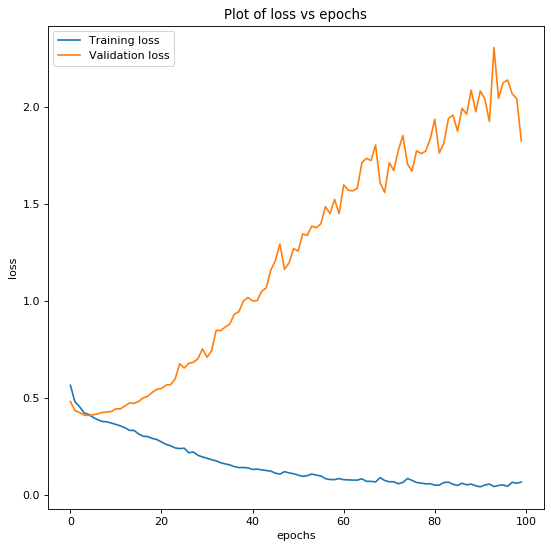

In [77]:
fig=plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(train_loss, label = 'Training loss')
plt.plot(val_loss, label = 'Validation loss')
plt.title('Plot of loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

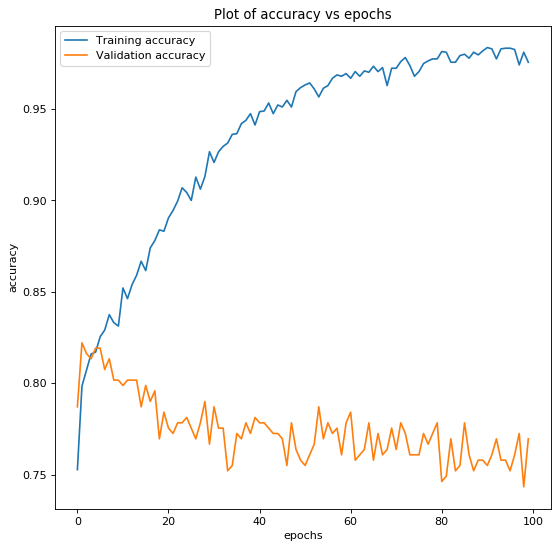

In [78]:
fig=plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(train_acc, label = 'Training accuracy')
plt.plot(val_acc, label = 'Validation accuracy')
plt.title('Plot of accuracy vs epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [79]:
pred_nn = np.abs(np.round(model.predict(x_test)))

In [80]:
conf_mat_nn = confusion_matrix(y_test, pred_nn)
print(conf_mat_nn)

[[184  39]
 [ 36  83]]


In [81]:
print('NN Classifier report:')
print(classification_report(y_test, pred_nn))
print('AUC score: ',  roc_auc_score(y_test, pred_nn))


NN Classifier report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       223
           1       0.68      0.70      0.69       119

    accuracy                           0.78       342
   macro avg       0.76      0.76      0.76       342
weighted avg       0.78      0.78      0.78       342

AUC score:  0.7612955496099785


## Telling the story with Data (Model evaluation and reporting)

From above three methods, Random forest classifier provides best results for the current dataset.

# EOF